In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl

sys.path.insert(0, '..')
from context.nd_array.nd_array.normalize_2d_array import normalize_2d_array
from context.fit_skew_t_pdf import fit_skew_t_pdf
from context.fit_skew_t_pdfs import fit_skew_t_pdfs
from context.compute_context import compute_context
from context.make_context_matrix_and_summarize_context import *
from context.plot_context import plot_context

In [3]:
gene_x_cell_line = pd.read_table('gene_x_cell_line.tsv', index_col=0)

gene_x_cell_line = pd.DataFrame(
    normalize_2d_array(gene_x_cell_line.values, '-0-'),
    index=gene_x_cell_line.index,
    columns=gene_x_cell_line.columns)

gene_x_cell_line

,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,A673_BONE,ACHN_KIDNEY,...,UACC812_BREAST,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,ZR751_BREAST
KRAS,1.273035,1.196565,0.049496,-0.373866,0.757640,1.014405,0.535691,-0.999510,1.019379,0.768209,...,-0.144332,0.625631,-0.169096,0.549990,0.169672,0.206414,-0.222584,-0.539447,1.156983,-0.385678
SOX10,-0.904389,0.902912,0.411764,-0.929464,0.620036,-0.509605,-3.134450,0.328041,0.966326,-0.582552,...,0.424405,-4.222437,-0.631874,-3.501257,-4.419310,-2.197746,-3.934379,-0.100273,-0.802843,0.667493
ERBB3,0.535069,0.373426,-0.574884,0.411764,0.530925,0.048750,0.343376,-0.067841,0.371768,0.102009,...,-3.144812,1.100822,0.452589,0.469168,-0.106884,0.858564,0.627704,-1.035983,-0.512299,-0.346303
MYC,0.929646,0.601177,-0.750205,1.260186,1.134187,0.477043,1.042589,-0.219890,0.417359,0.485747,...,0.429172,1.005908,-0.960550,-0.265067,-0.081581,0.892965,-0.833100,-1.249850,-0.459454,-0.765126
MAP4K4,1.081757,-0.735906,0.414458,0.274367,1.042175,0.415287,1.046941,-0.396869,-0.052796,0.141840,...,0.012531,-0.102553,0.037165,0.191100,1.627408,0.434767,1.090875,1.251690,1.376445,-0.449714
GAPDH,1.777446,-0.814863,-1.259176,2.179069,-0.883458,2.228805,-1.805656,1.094398,-0.388165,2.349002,...,1.616631,1.798377,-1.306218,2.000432,-1.203015,0.567398,-0.832063,-0.500487,-1.091315,1.065592
FAT1,0.116246,-0.895063,0.276025,0.035611,-0.355422,0.194229,-0.398112,-0.401635,-0.212222,-0.575713,...,-0.561414,-0.249110,0.070779,-0.371172,-0.677466,-0.173137,0.725726,0.240588,0.696506,-0.094740
PTEN,-0.575299,-0.005482,-0.959306,-0.157512,-0.884701,-0.085166,-0.443911,-0.291386,-0.537789,-0.880142,...,-0.826468,-0.378839,0.057930,-0.108729,-0.339257,-0.754972,0.865817,0.230226,0.685522,-0.539447
TP53,-0.344438,1.166930,-0.460697,1.192213,0.688838,1.056474,-1.189130,0.211989,-0.737150,0.234785,...,-0.429198,2.690940,0.572372,3.366528,1.269305,1.307022,-0.414277,-0.718706,-1.069348,1.096470


In [4]:
array_1d = gene_x_cell_line.loc['KRAS']

In [5]:
n, location, scale, df, shape = fit_skew_t_pdf(array_1d)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

n, location, scale, df, shape = fit_skew_t_pdf(
    array_1d, fit_fixed_location=10, fit_fixed_scale=10)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


N=501	Location=1.083	Scale=1.164	DF=4.304	Shape=-3.030
N=501	Location=10.000	Scale=10.000	DF=14163340.542	Shape=-16799704.068


In [6]:
context_dict = compute_context(array_1d)

for key, value in context_dict.items():
    print(key)
    print(value)
    print(value.shape)
    print()

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


fit
[ 501.            1.08313306    1.1642748     4.30439247   -3.03015488]
(5,)

grid
[-4.39651442 -4.39442749 -4.39234055 ...,  1.85803163  1.86011856
  1.8622055 ]
(3000,)

pdf
[ 0.00523723  0.0052461   0.00525498 ...,  0.02071609  0.02054863
  0.02038261]
(3000,)

pdf_reference
[  2.87205685e-35   3.08293114e-35   3.30918081e-35 ...,   2.17811577e-01
   2.17220925e-01   2.16631154e-01]
(3000,)

context_indices
[-1. -1. -1. ...,  0.  0.  0.]
(3000,)

context_indices_like_array
[ 0.          0.         -0.3278829  -0.79991162  0.          0.         -0.
 -0.99489726  0.          0.         -1.          0.          0.
 -0.99999988 -0.43240023 -0.         -0.         -0.09033499  0.          0.
 -0.          0.         -1.          0.         -0.28252459 -0.38692258
 -1.         -0.         -0.          0.          0.         -0.
 -0.11530486 -0.09783392 -0.18850638 -0.         -0.90148573  0.          0.
 -1.         -0.19877783 -0.42440125  0.          0.         -0.          0.
 -0.

In [7]:
feature_x_skew_t_pdf_fit_parameter = fit_skew_t_pdfs(gene_x_cell_line)

feature_x_skew_t_pdf_fit_parameter

(1/9) KRAS ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(2/9) SOX10 ...
(3/9) ERBB3 ...
(4/9) MYC ...
(5/9) MAP4K4 ...
(6/9) GAPDH ...
(7/9) FAT1 ...
(8/9) PTEN ...
(9/9) TP53 ...


,N,Location,Scale,DF,Shape
Feature,,,,,
KRAS,501.0,1.083133,1.164275,4.304392,-3.030155
SOX10,501.0,0.550756,0.592344,2.306226,-0.929914
ERBB3,501.0,0.452074,0.606843,3.987367,-1.111803
MYC,501.0,-0.946118,1.227359,15.292884,2.261243
MAP4K4,501.0,0.482438,0.885836,7.522607,-0.764379
GAPDH,501.0,-1.666089,2.258010,1279.158480,2.326992
FAT1,501.0,-0.173529,0.362648,15.376174,0.699471
PTEN,501.0,-0.808029,1.057576,198799.571299,3.093096
TP53,501.0,-1.357790,1.506077,6.161618,5.347668


In [8]:
context__feature_x_sample, feature_context_summary = make_context_matrix_and_summarize_context(
    gene_x_cell_line)

(1/9) KRAS ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(2/9) SOX10 ...
(3/9) ERBB3 ...
(4/9) MYC ...
(5/9) MAP4K4 ...
(6/9) GAPDH ...
(7/9) FAT1 ...
(8/9) PTEN ...
(9/9) TP53 ...


In [9]:
context__feature_x_sample

,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,A673_BONE,ACHN_KIDNEY,...,UACC812_BREAST,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,ZR751_BREAST
Feature,,,,,,,,,,,,,,,,,,,,,
KRAS,0.000000,0.000000e+00,-3.278829e-01,-7.999116e-01,0.000000,0.000000e+00,-0.000000,-9.948973e-01,0.00000,0.000000,...,-0.569443,0.000000,-5.987671e-01,-0.000000e+00,-0.175733,-0.130303,-0.659264,-9.044621e-01,0.000000,-0.809649
SOX10,-0.834981,0.000000e+00,0.000000e+00,-8.518207e-01,0.000000,-4.016508e-01,-1.000000,0.000000e+00,0.00000,-0.497736,...,0.000000,-1.000000,-5.600091e-01,-1.000000e+00,-1.000000,-0.999994,-1.000000,-2.042137e-03,-0.749865,0.000000
ERBB3,0.000000,0.000000e+00,-2.087570e-01,0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.00000,-0.000000,...,-1.000000,0.000000,0.000000e+00,0.000000e+00,-0.000000,0.000000,0.000000,-7.818820e-01,-0.145468,-0.037106
MYC,0.529448,2.155811e-01,-0.000000e+00,8.061275e-01,0.714906,1.268069e-01,0.636192,0.000000e+00,0.09358,0.131858,...,0.099964,0.602291,-0.000000e+00,0.000000e+00,0.000000,0.492989,-0.000000,-0.000000e+00,-0.000000,-0.000000
MAP4K4,0.000000,-9.059935e-04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,-0.000000e+00,-0.00000,0.000000,...,-0.000000,-0.000000,-0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.000000
GAPDH,0.261509,-0.000000e+00,-0.000000e+00,5.042089e-01,-0.000000,5.346786e-01,-0.000000,2.998354e-02,0.00000,0.606638,...,0.180463,0.273454,-0.000000e+00,3.944150e-01,-0.000000,0.001266,-0.000000,0.000000e+00,-0.000000,0.026413
FAT1,0.000000,-0.000000e+00,1.441630e-10,0.000000e+00,-0.000000,0.000000e+00,-0.000000,-0.000000e+00,-0.00000,-0.000000,...,-0.000000,-0.000000,0.000000e+00,-0.000000e+00,-0.000000,-0.000000,0.014551,5.193513e-13,0.008534,-0.000000
PTEN,-0.000000,7.789792e-09,-0.000000e+00,1.448880e-14,-0.000000,2.491223e-11,-0.000000,1.274370e-28,-0.00000,-0.000000,...,-0.000000,-0.000000,2.627785e-07,2.921404e-12,-0.000000,-0.000000,0.640445,2.033589e-04,0.287045,-0.000000
TP53,0.448225,9.999999e-01,2.623107e-01,9.999999e-01,0.999777,9.999993e-01,-0.000000,9.677995e-01,0.00000,0.973058,...,0.312668,1.000000,9.990422e-01,1.000000e+00,1.000000,1.000000,0.340040,0.000000e+00,-0.000000,1.000000


In [10]:
feature_context_summary

Feature
KRAS     -198.543315
SOX10    -139.732710
ERBB3     -73.107958
MYC       115.802537
MAP4K4    -43.960232
GAPDH     140.186960
FAT1        2.300604
PTEN       77.328362
TP53      244.191914
Name: Context Summary, dtype: float64

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


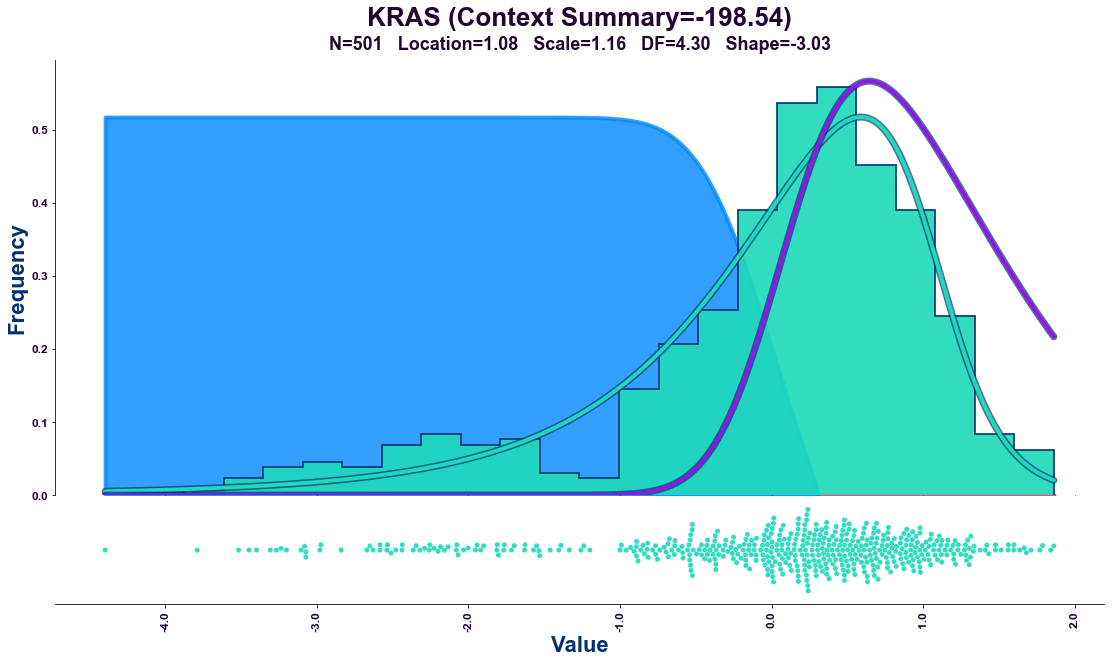

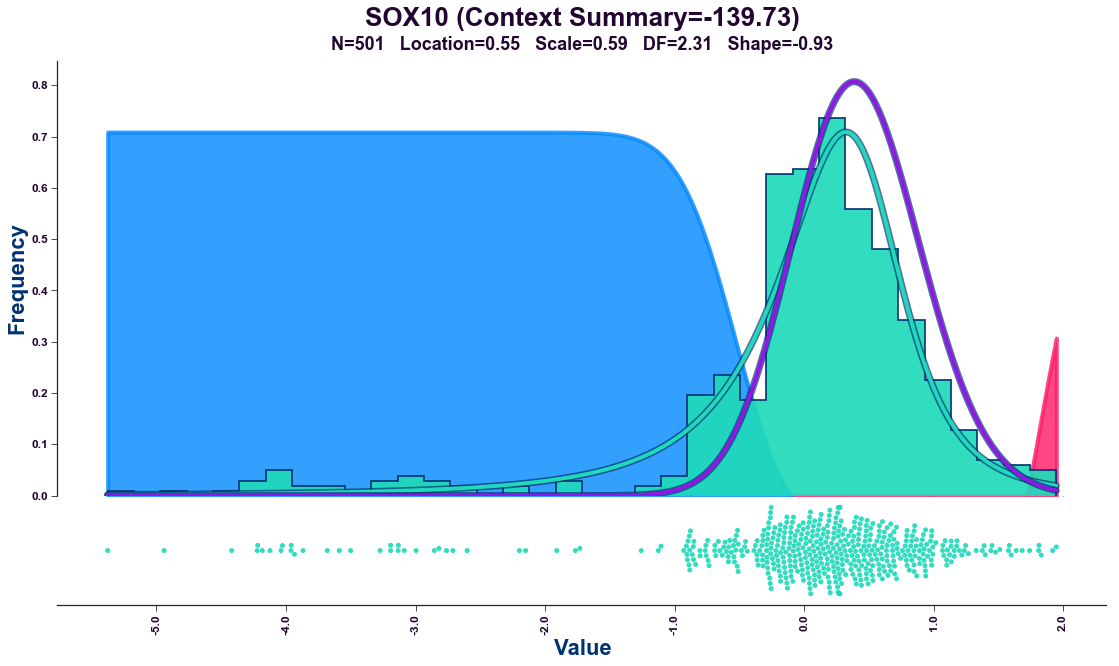

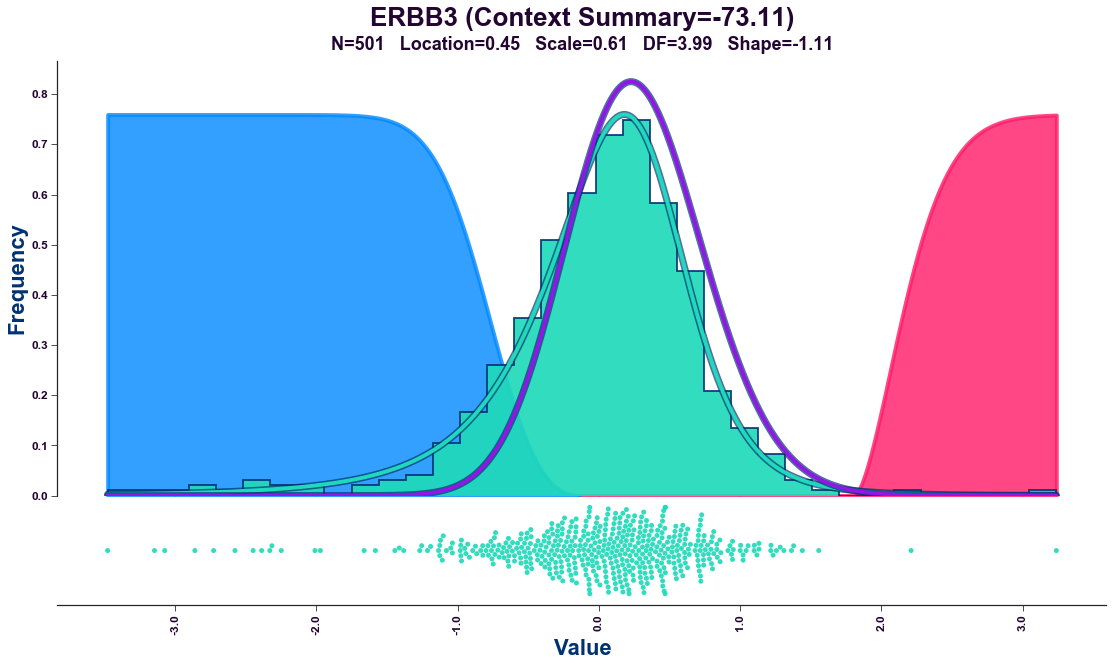

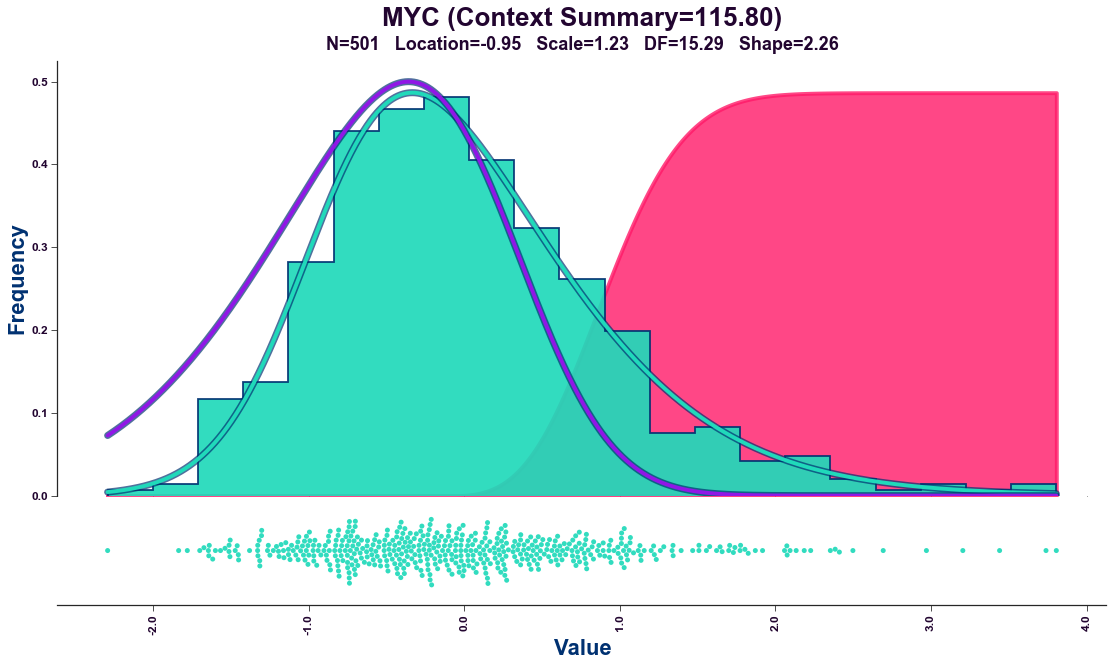

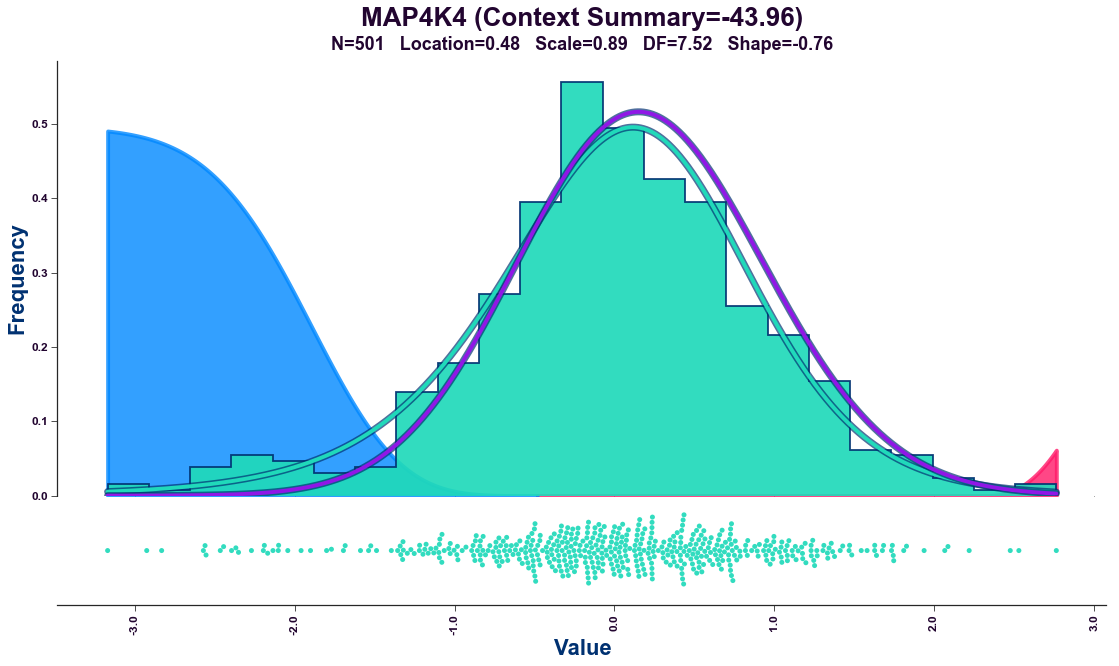

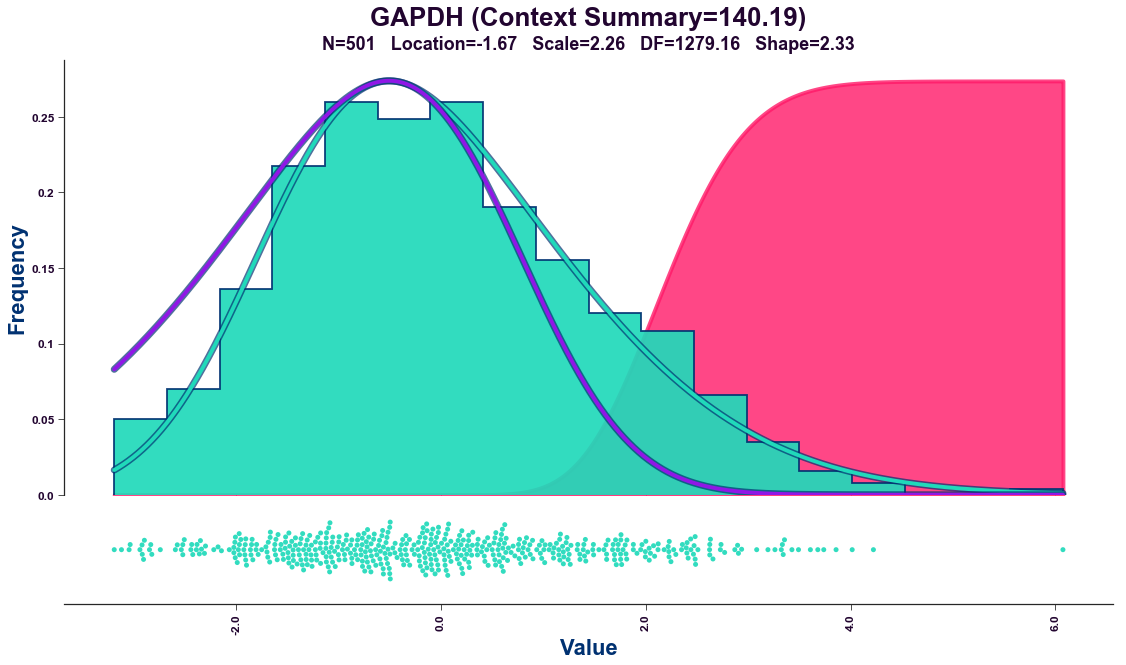

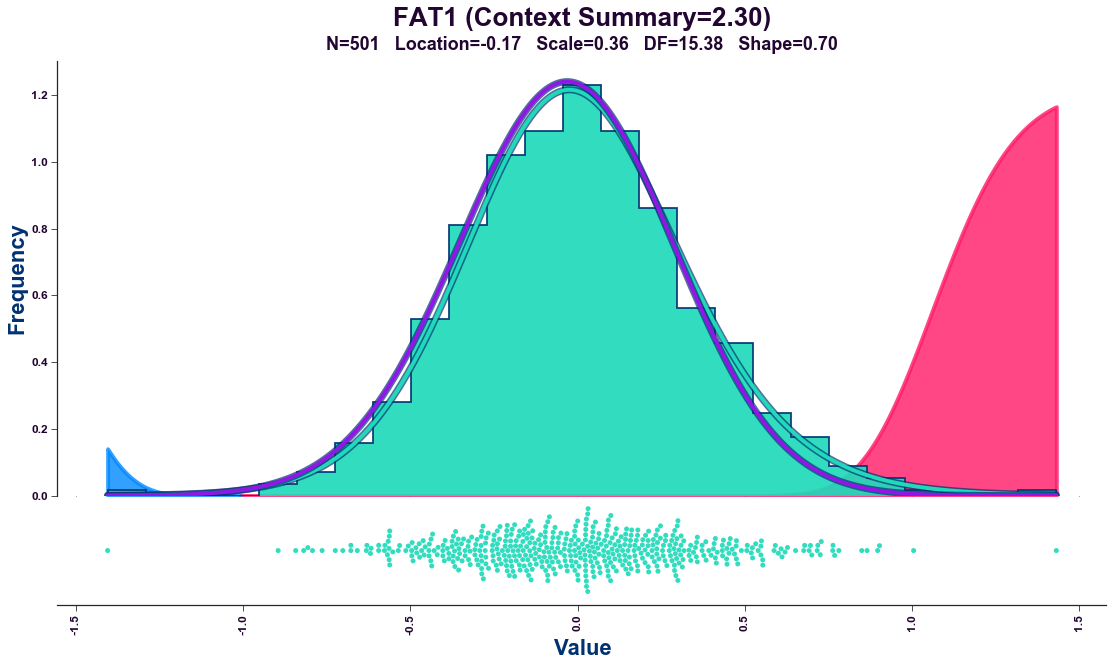

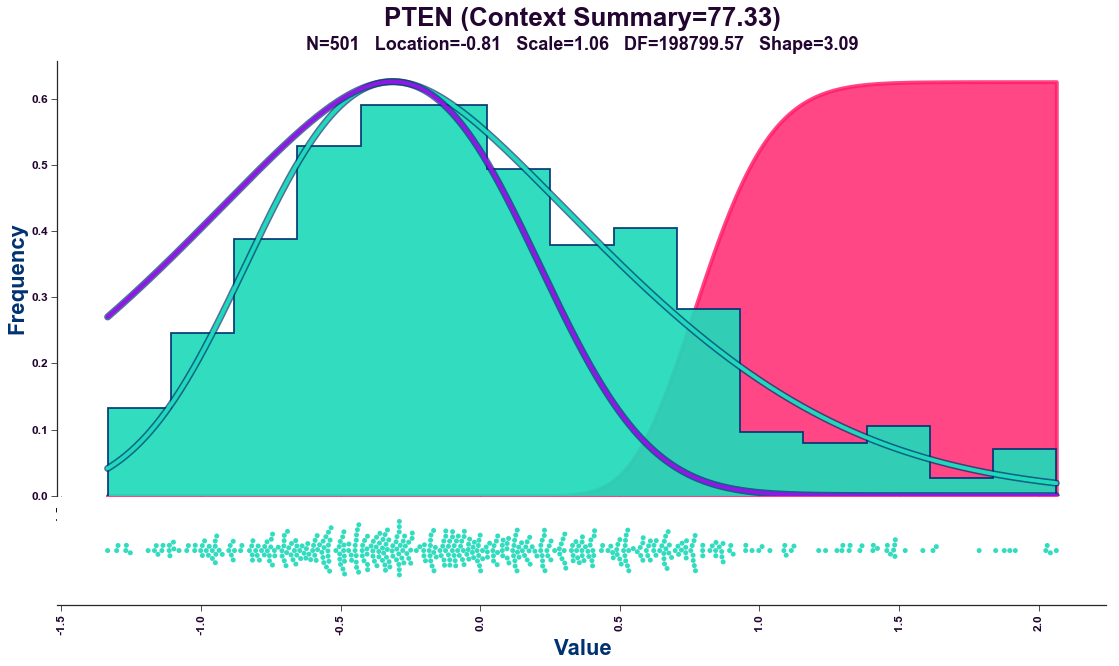

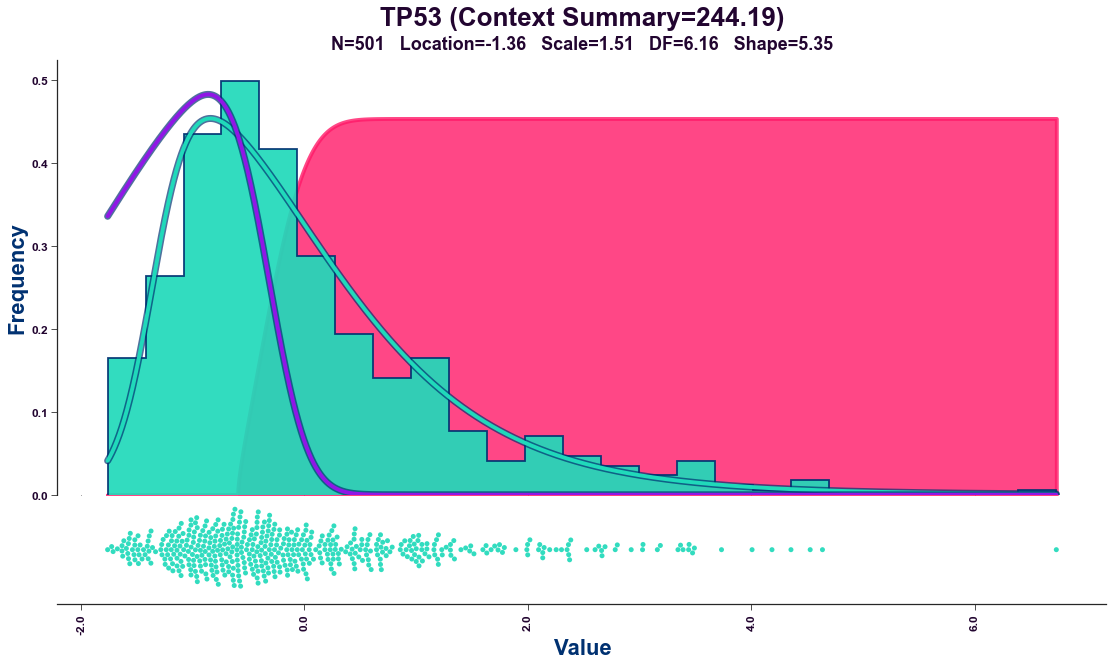

In [11]:
for feature, feature_vector in gene_x_cell_line.iterrows():
    plot_context(feature_vector, feature, add_context_summary_to_title=True)

    mpl.pyplot.show()

In [12]:
compound_x_cell_line = pd.read_table('compound_x_cell_line.tsv', index_col=0)

compound_x_cell_line = pd.DataFrame(
    normalize_2d_array(compound_x_cell_line.values, '-0-'),
    index=compound_x_cell_line.index,
    columns=compound_x_cell_line.columns)

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


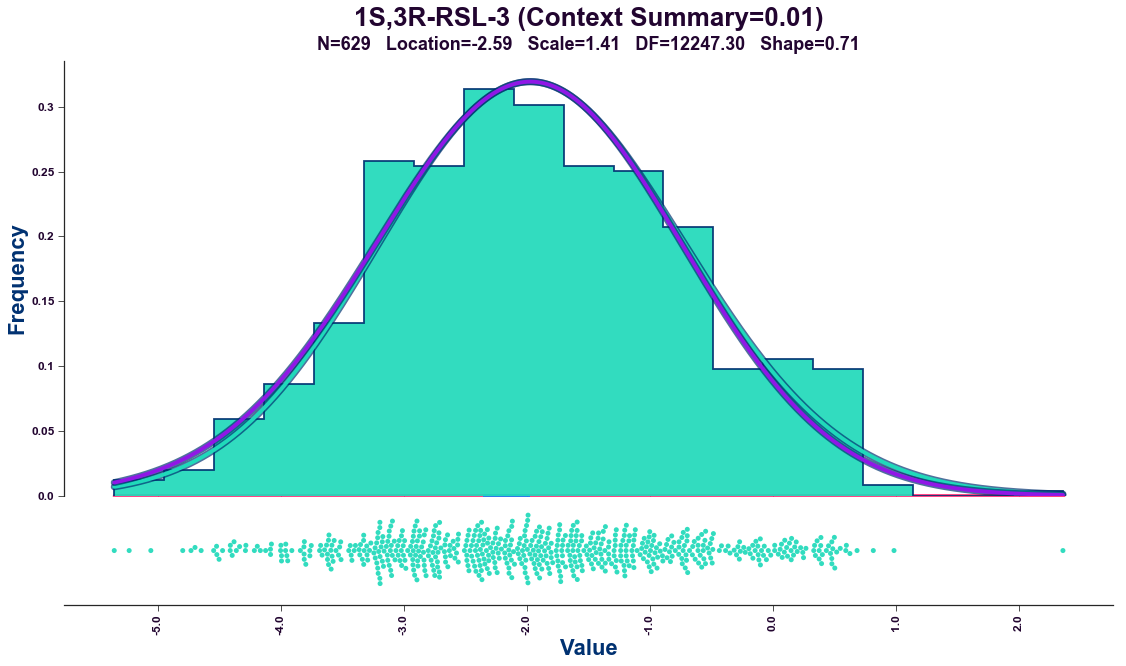

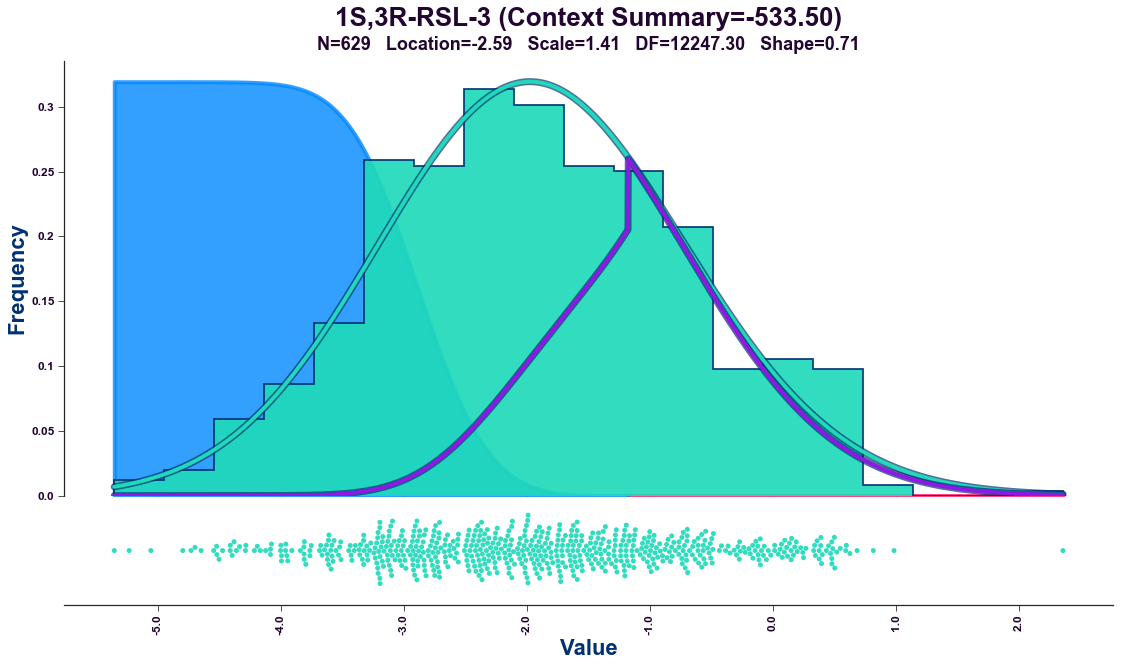

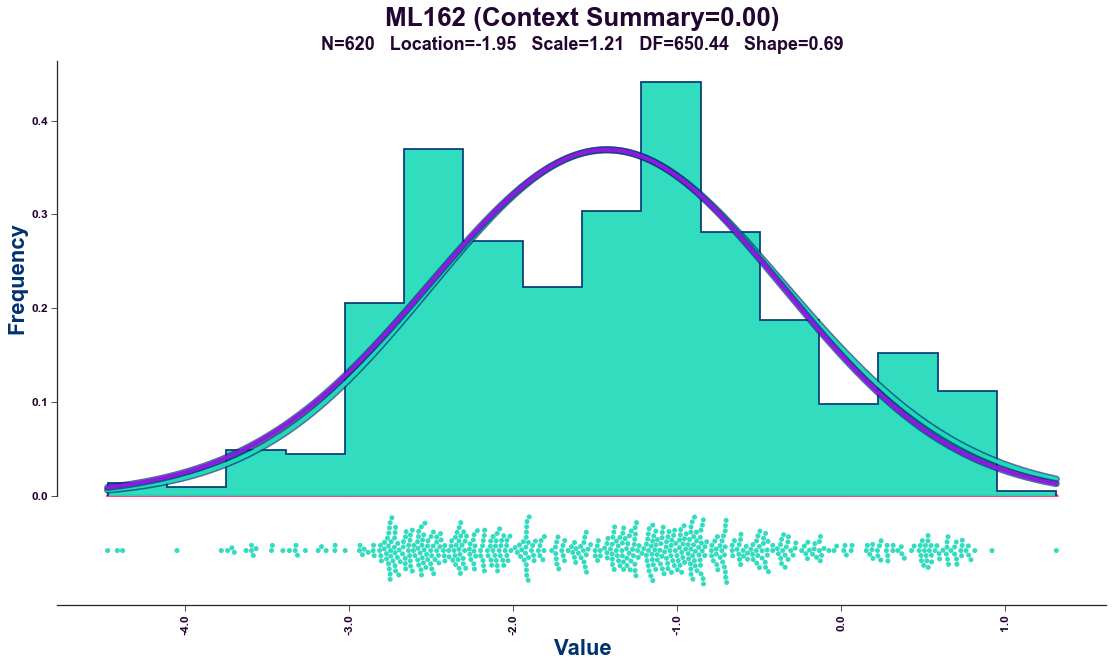

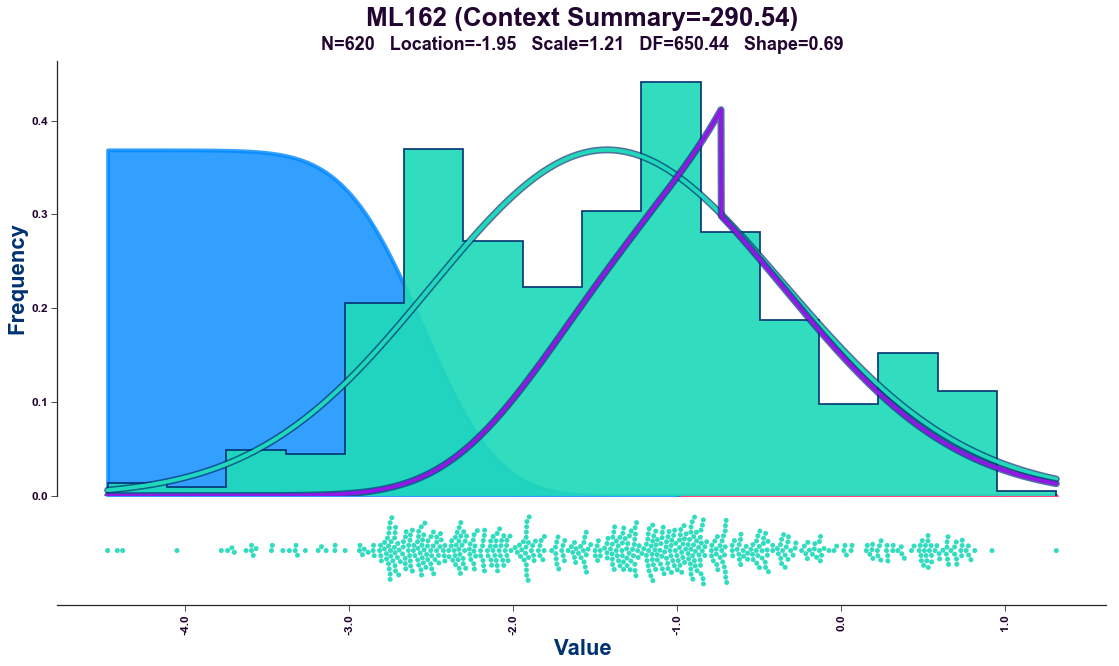

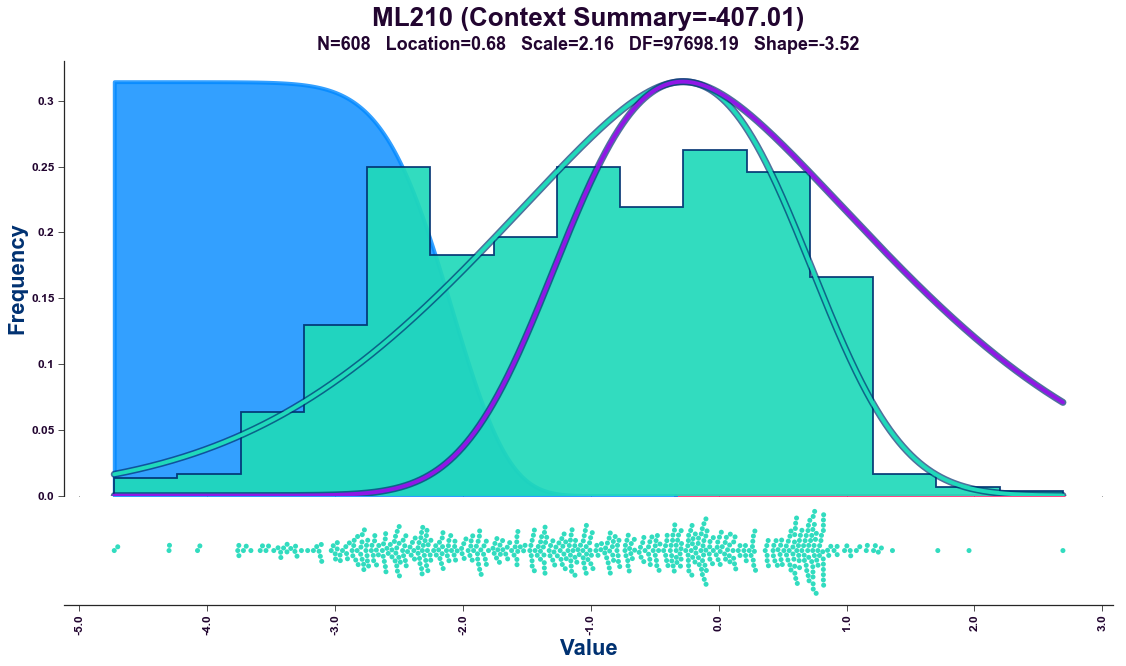

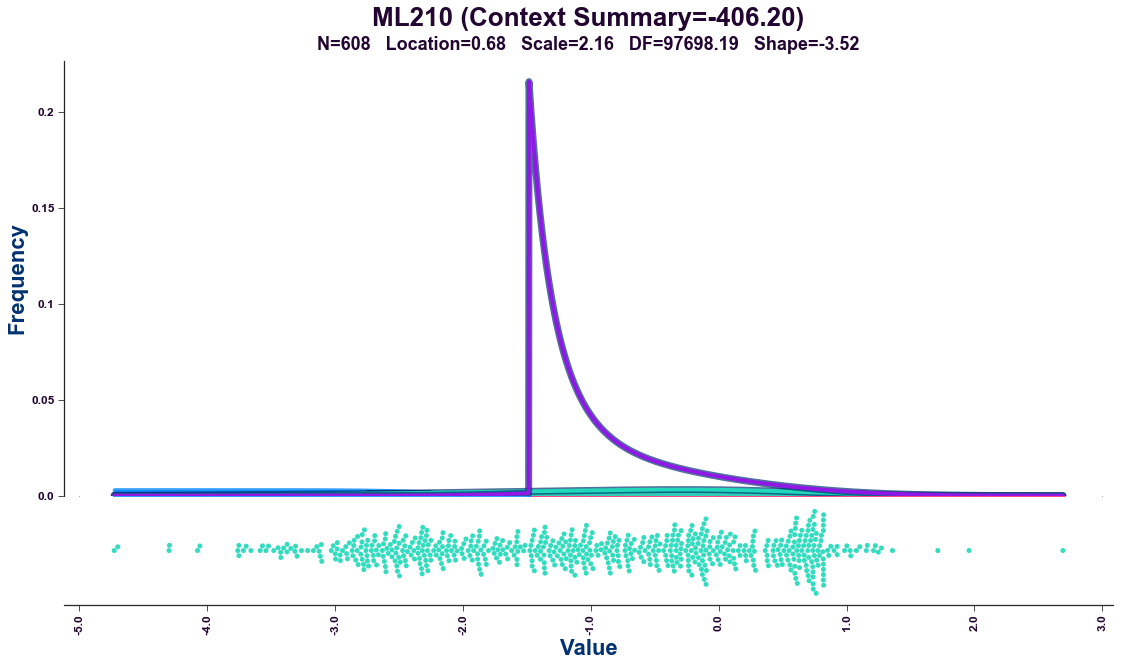

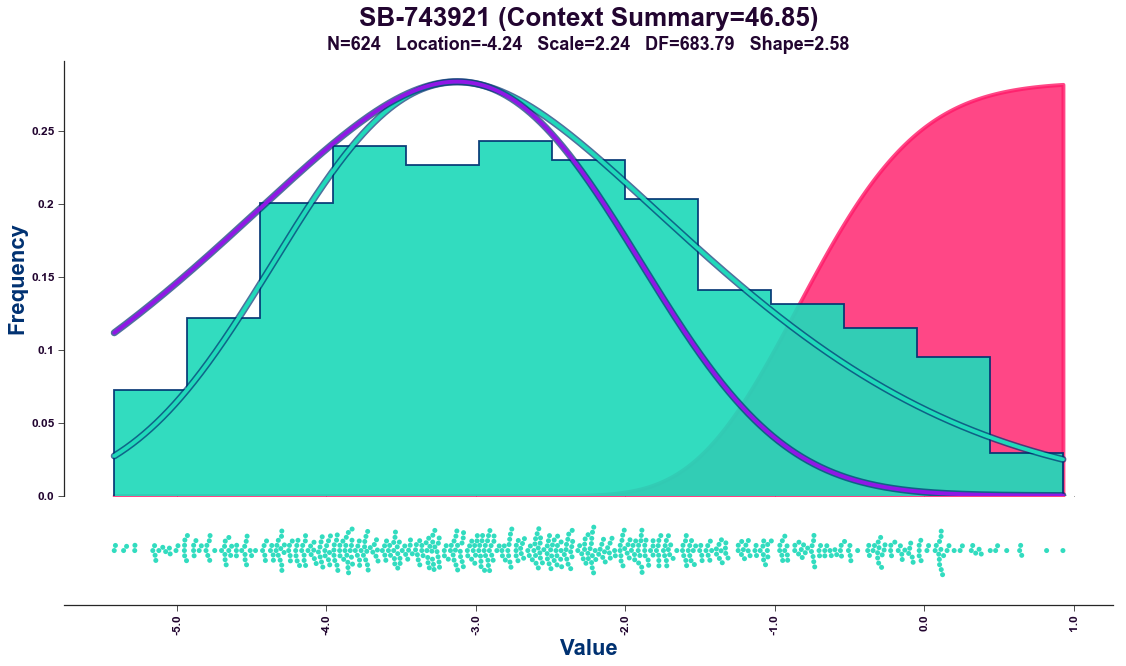

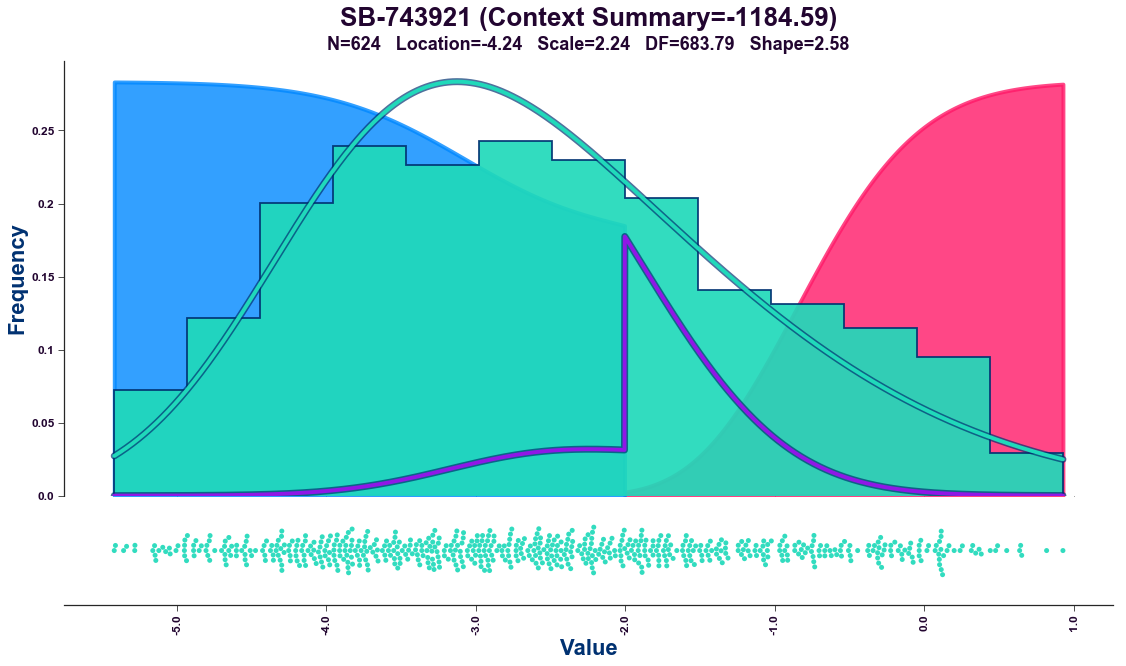

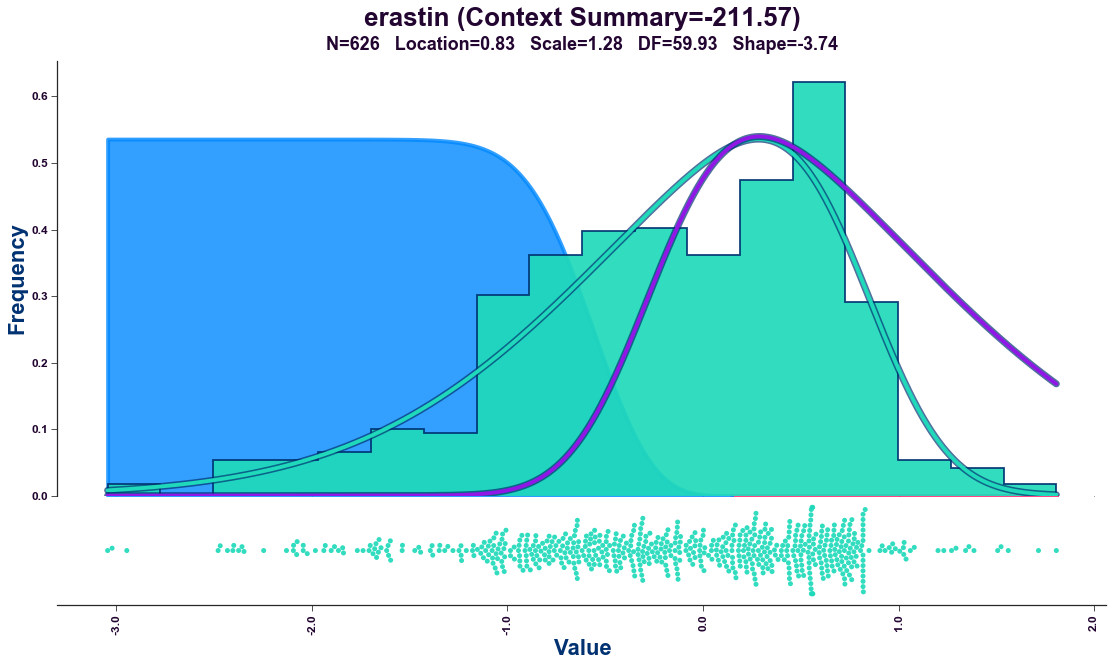

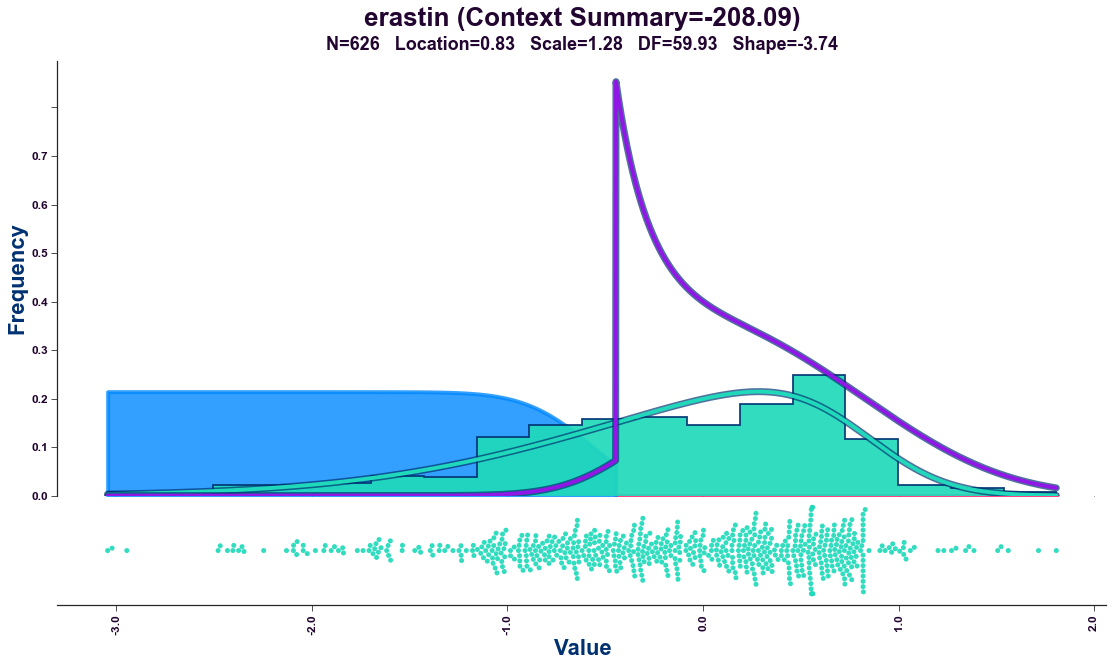

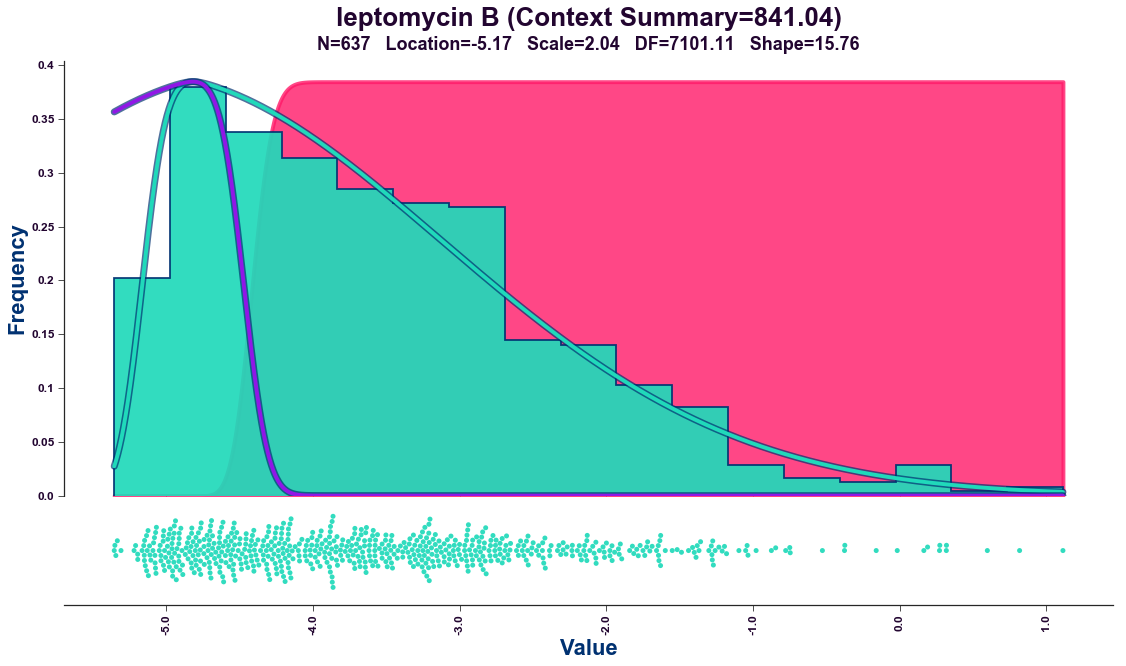

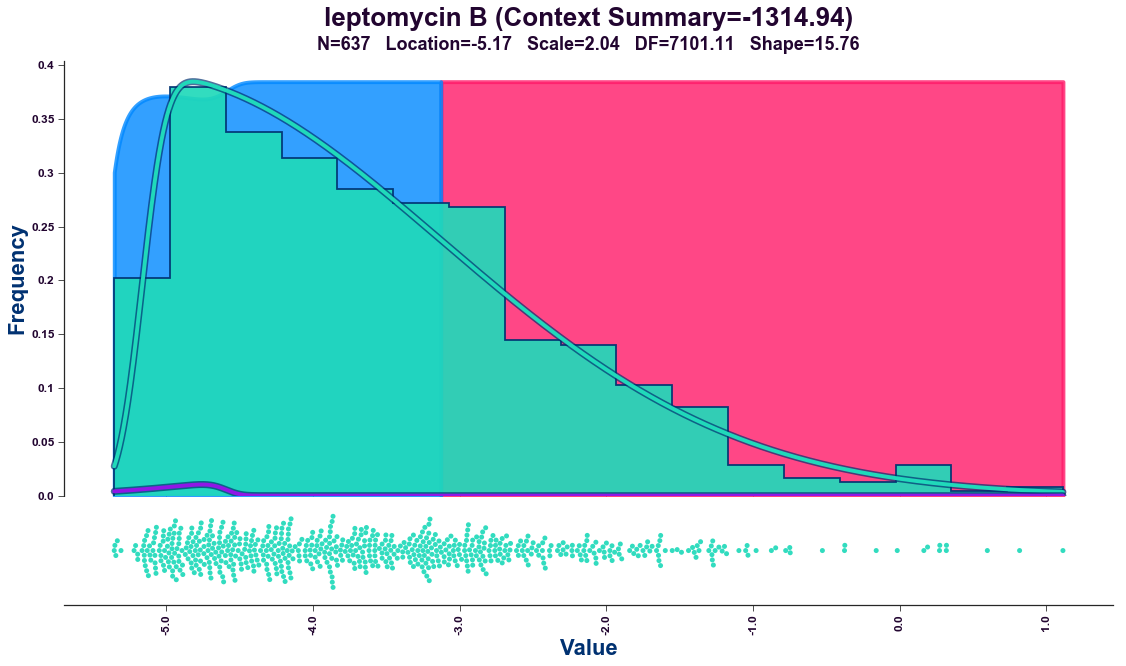

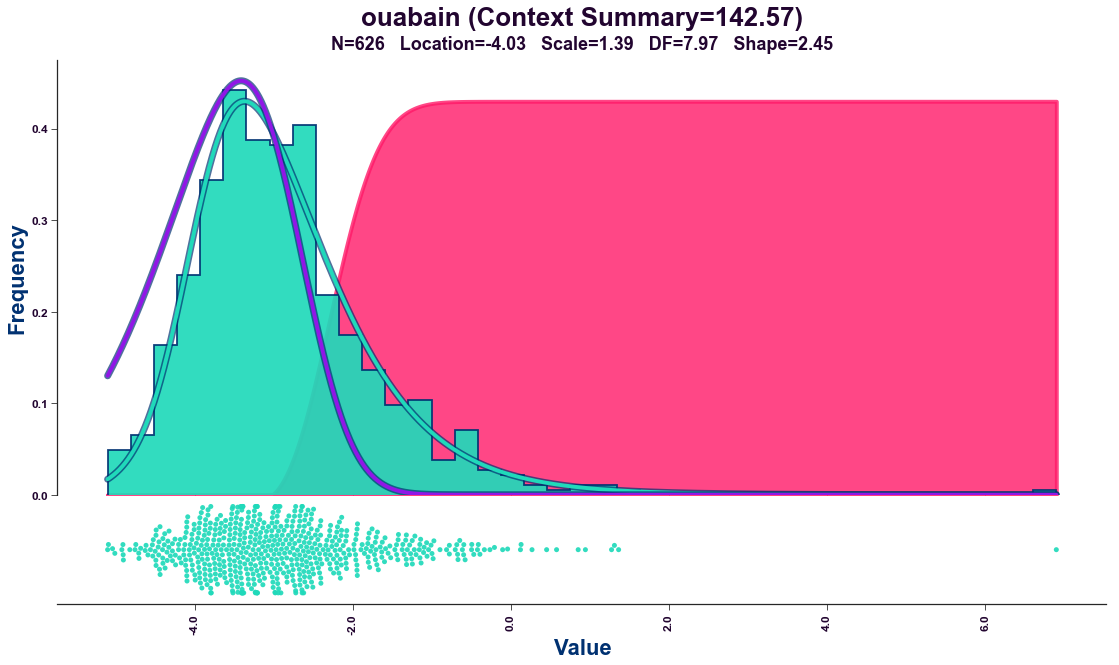

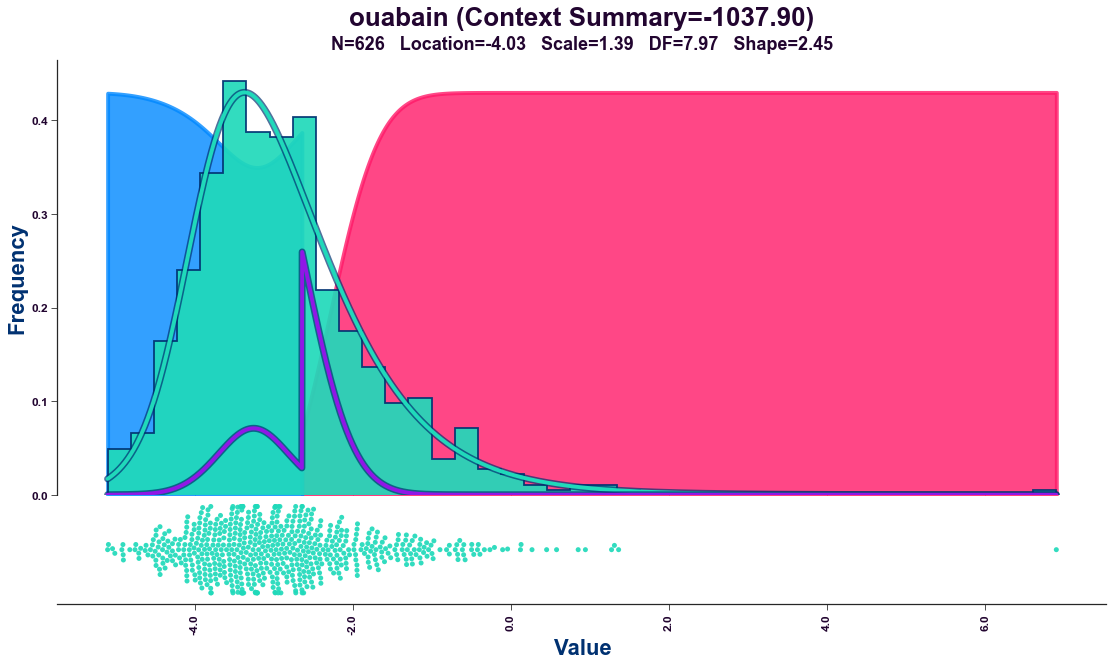

In [44]:
for feature, feature_vector in compound_x_cell_line.iterrows():

    if feature not in (
            '1S,3R-RSL-3',
            'ML162',
            'ML210',
            'erastin',
            'leptomycin B',
            'SB-743921',
            'ouabain', ):
        continue

    plot_context(
        feature_vector.dropna(), feature, add_context_summary_to_title=True)

    plot_context(
        feature_vector.dropna(),
        feature,
        true_mean=0,
        add_context_summary_to_title=True)

    mpl.pyplot.show()